# Figure 2

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [2]:
import NotebookImport
from DX_screen import *

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

In [3]:
cd ../DX/Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [4]:
from Imports import *
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


Pull in log-hazard ratios from stratified pan-cancer survival screen

In [5]:
pancan_haz = pd.read_csv('r_pancan.csv', header=None, 
                         index_col=0, squeeze=True)

In [7]:
g = ['PCNA', 'CKS2', 'NUSAP1', 'RRM2', 'ZWINT', 
     'PRC1', 'TFDP1', 'CCNA2', 'CCNB1', 'MELK', 
     'TPX2', 'BIRC5', 'NCAPG2', 'RFWD3', 'TACC3', 
     'KIAA0101', 'MCM2', 'MCM5', 'ASF1B', 'CCNB2', 
     'GTPBP2', 'KIF20A', 'PTTG1', 'AURKA', 'CDC20', 
     'FOXM1', 'GINS2', 'MAD2L1', 'UBE2C', 'GINS1', 
     'MCM6', 'NCAPD2', 'NUP37', 'CKS1B', 'MCM7', 
     'ARID3A', 'AURKB', 'CDCA8', 'SNRPD1', 'TROAP', 
     'C21orf45', 'DDX39', 'ESPL1', 'HMBS', 'LSM6', 
     'MCM4', 'NCAPD3', 'PPIH', 'DTL', 'EPB42', 'HMGN2',
     'MCM3', 'PF4', 'PPBP', 'RFC4', 'TOP2A', 'BUB1B', 
     'CDT1', 'FEN1', 'GATA1', 'GYPB', 'HMGB2', 'KIF22', 
     'KLF1', 'MLF1IP', 'RFC3', 'RHCE', 'TAL1', 'TCF3', 
     'ALAS2', 'CDCA3', 'CENPA', 'CKLF', 'GTSE1', 
     'NFE2', 'OIP5', 'SHCBP1', 'SNF8', 'SNRPB', 'SPTA1', 
     'KEL', 'KIF2C', 'LYL1', 'PSMD9', 'RACGAP1', 'RPIA',
     'TIMELESS', 'TRMT5', 'TYMS', 'VRK1', 'FBXO7', 'H3F3A',
     'NUDT1', 'PLEK', 'POLE2', 'RHAG', 'WHSC1', 'APOBEC3B', 
     'BPGM', 'CHAF1A', 'DNAJC9', 'FBXO5', 'KIF4A', 'KLF15', 
     'MKI67', 'PGD', 'RPA3', 'SFRS2', 'TRIM58', 'ADAMTS13', 
     'CDCA4', 'CDKN3', 'FECH', 'LBR', 'LIG1', 'LMNB1', 'MICB', 
     'NUP210', 'ORC6L', 'RAD51AP1', 'RHD', 'SMC4', 'GYPA', 
     'RPP30', 'TRIM10']
meta_pcna = rna_df.ix[g].median()[:,'01']
meta_pcna.name = 'meta_pcna'
len(meta_pcna)

9051

In [9]:
rr = screen_feature(meta_pcna, pearson_pandas, rna_df.xs('01',1,1))

In [10]:
standardize = lambda s: s.sub(s.median(1), axis=0).div(s.mad(1), axis=0)
df = rna_df.xs('01',1,1)
df_s = df.groupby(codes, axis=1).apply(standardize)
mp2 = meta_pcna.groupby(codes).apply(standardize)

In [11]:
pcna_corr = df_s.T.corrwith(mp2)

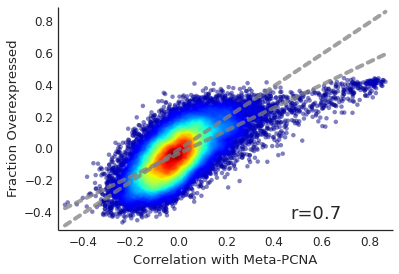

In [12]:
fig, ax = subplots()
f = pcna_corr
plot_regression(f, dx_rna.frac - .5, density=True, rad=.03, s=20,
                rasterized=True, ax=ax)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ylabel('Fraction Overexpressed')
ax.set_xlabel('Correlation with Meta-PCNA')

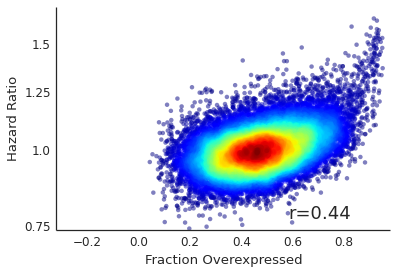

In [14]:
fig, ax = subplots()
f = dx_rna.frac
plot_regression(f, pancan_haz, density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True, ax=ax)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ybound(-.3,.55)
ax.set_yticks(np.log([.75, 1, 1.25, 1.5]))
ax.set_yticklabels(np.round(np.exp(ax.get_yticks()), 2))
ax.set_ylabel('Hazard Ratio')
ax.set_xlabel('Fraction Overexpressed')

In [15]:
m = pd.rolling_mean(dx_rna.frac.ix[pancan_haz.order().index].dropna(), 
                    window=500, center=True).dropna()
m2 = pd.rolling_mean(dx_rna.frac.ix[pancan_haz.order().index].dropna(), 
                    window=50, center=True).dropna()
m = m.combine_first(m2)
f_win = (dx_rna.frac - m).dropna()
f_win.name = 'fraction overexpressed\n(detrended)'

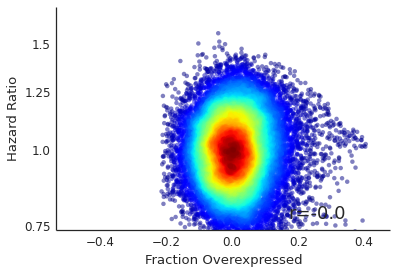

In [17]:
fig, ax = subplots()
plot_regression(pancan_haz, f_win, density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True, ax=ax)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ybound(-.3,.55)
ax.set_yticks(np.log([.75, 1, 1.25, 1.5]))
ax.set_yticklabels(np.round(np.exp(ax.get_yticks()), 2))
ax.set_ylabel('Hazard Ratio')
ax.set_xlabel('Fraction Overexpressed')

In [20]:
gs2 = gene_sets.ix[f_win.index].fillna(0)
r2 = screen_feature(f_win, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * f_win).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

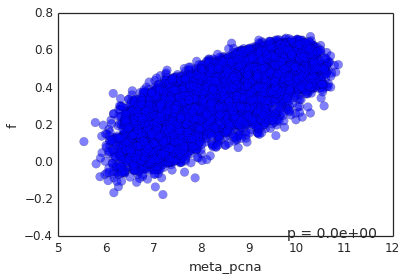

In [56]:
series_scatter(meta_pcna, rna_sig)

In [46]:
f = 'Surv(days, event) ~ meta_pcna + f + codes'

In [49]:
get_cox_ph(surv_5y, covariates=[meta_pcna, rna_sig, codes], formula=f, 
           interactions=False, print_desc=True);


            coef exp(coef) se(coef)     z    p
meta_pcna 0.3481      1.42   0.0382 9.102 0.00
f         0.0168      1.02   0.0397 0.422 0.67

Likelihood ratio test=236  on 2 df, p=0  n= 8478, number of events= 1889 



RNA proliferation signature

In [9]:
rna_sig = pd.read_csv('/cellar/users/agross/TCGA_Code/DX/rna_signature.csv',
                      index_col=[0,1], header=None, squeeze=True)
rna_sig = rna_sig[:,1]
rna_sig.index.name = ''

In [40]:
f = meta_pcna.copy()
f = (f - f.mean()) / f.std()
f.name = 'feature'
codes_f = codes.ix[(codes.index.intersection(f.index).intersection(stage.index).
                    intersection(age.index).intersection(old.index))]
codes_f.name = 'codes'
m = get_cox_ph(surv_5y, f, [age, old, stage, codes_f], 
               print_desc=False, interactions=False)
ci = convert_robj(robjects.r.summary(m)[7])
ci.index = ci.index.map(lambda s: s.replace('codes', ''))
ci.index = ci.index.map(lambda s: s.replace('stagestage', 'stage'))
pancan_ci = ci.ix['feature']
pancan_ci.name = 'PANCAN'

In [41]:
v = meta_pcna
ci = {}
for c in codes.unique():
    try:
        pts = ti(codes == c)
        f = v.ix[pts].dropna()
        cov = [b.ix[pts].dropna() for b in [old, age] if 
               b.ix[pts].dropna().unique().shape[0] > 1]
        f = (f - f.mean()) / f.std()
        f.name = 'featue'
        ff = ' + '.join(['feature'] + [b.name for b in cov])
        formula = robjects.Formula('Surv(days, event) ~ ' + ff)
        m1 = get_cox_ph(surv_5y, f, covariates=cov, formula=formula,
                        print_desc=False, interactions=False);
        ci[c] = convert_robj(robjects.r.summary(m1)[7])
    except:
        print c
cc = pd.concat(ci).xs('feature', level=1)
cc = cc.sort('exp(coef)', ascending=False)
cc = cc[(cc['upper .95'] - cc['lower .95']) < 4]

STAD
ESCA
LAML


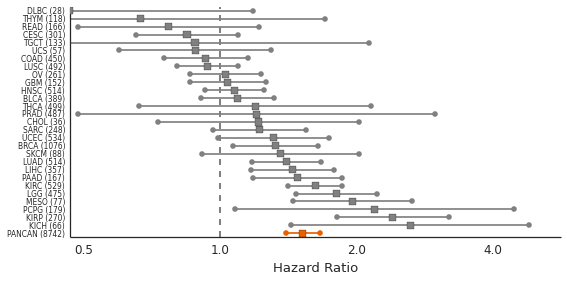

In [42]:
fig, ax = subplots(figsize=(8,4))
c2 = pd.DataFrame([pancan_ci]).append(cc)
colors = ['#E66101'] + (['grey'] * len(cc))
plot_HR(c2, ax=ax, colors=colors)
ax.set_xlim(-1.1, 2.5)
ax.set_xticks([-1,0,1,2])
ax.set_xticklabels(2.**ax.get_xticks())
codes_f = codes.ix[(codes.index.intersection(v.index).intersection(stage.index).
                    intersection(age.index).intersection(old.index))]
label = ['{} ({})'.format(i,c) for i,c in 
         codes_f.value_counts().ix[cc.index].iteritems()]
label = ['PANCAN ({})'.format(len(codes_f))] + label
ax.set_yticklabels(label, fontsize=7.5);
ax.set_xlabel('Hazard Ratio')
fig.tight_layout()

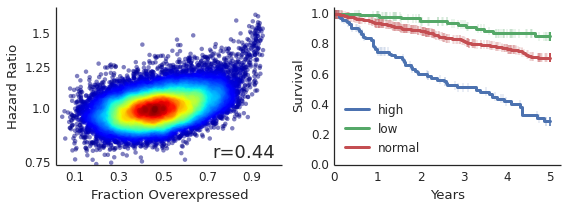

In [61]:
fig, axs = subplots(1,2, figsize=(8,3))
ax = axs[0]
f = dx_rna.frac
plot_regression(f - .5, pancan_haz, density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True, ax=ax)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ybound(-.3,.55)
ax.set_yticks(np.log([.75, 1, 1.25, 1.5]))
ax.set_yticklabels(np.round(np.exp(ax.get_yticks()), 2))
ax.set_ylabel('Hazard Ratio')
ax.set_xticklabels(ax.get_xticks() + .5)
ax.set_xlabel('Fraction Overexpressed')

ax = axs[1]
pts = ti(codes.str.startswith('K')).intersection(ti(age < 85))
draw_survival_curve(to_quants(rna_sig.ix[pts].dropna(), std=1, labels=True), 
                    surv_5y, ax=ax)
prettify_ax(ax)
fig.tight_layout()

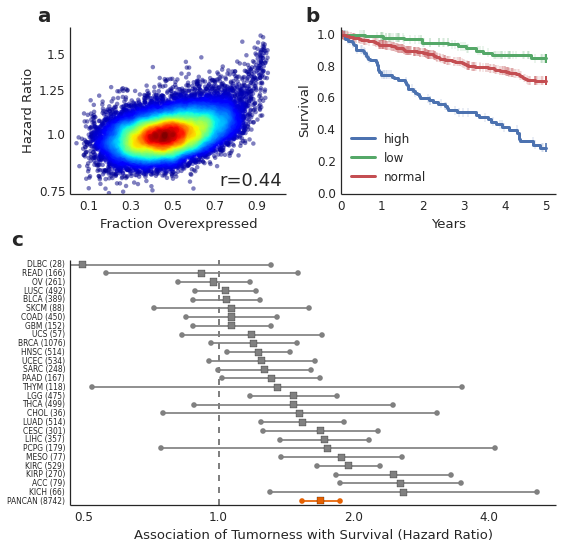

In [62]:
fig = plt.figure(figsize=(8, 7.5))
ax1 = plt.subplot2grid((7, 2), (0, 0), rowspan=3)
ax2 = plt.subplot2grid((7, 2), (0, 1), rowspan=3)
ax3 = plt.subplot2grid((7, 2), (3, 0), colspan=2, rowspan=4)

ax = ax1
f = dx_rna.frac
plot_regression(f - .5, pancan_haz, density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True, ax=ax)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ybound(-.3,.55)
ax.set_yticks(np.log([.75, 1, 1.25, 1.5]))
ax.set_yticklabels(np.round(np.exp(ax.get_yticks()), 2))
ax.set_ylabel('Hazard Ratio')
ax.set_xticklabels(ax.get_xticks() + .5)
ax.set_xlabel('Fraction Overexpressed')

ax = ax2
pts = ti(codes.str.startswith('K')).intersection(ti(age < 85))
draw_survival_curve(to_quants(rna_sig.ix[pts].dropna(), std=1, labels=True), 
                    surv_5y, ax=ax)
prettify_ax(ax)

ax = ax3
c2 = pd.DataFrame([pancan_ci]).append(cc)
colors = ['#E66101'] + (['grey'] * len(cc))
plot_HR(c2, ax=ax, colors=colors)
ax.set_xlim(-1.1, 2.5)
ax.set_xticks([-1,0,1,2])
ax.set_xticklabels(2.**ax.get_xticks())
codes_f = codes.ix[(codes.index.intersection(v.index).intersection(stage.index).
                    intersection(age.index).intersection(old.index))]
label = ['{} ({})'.format(i,c) for i,c in 
         codes_f.value_counts().ix[cc.index].iteritems()]
label = ['PANCAN ({})'.format(len(codes_f))] + label
ax.set_yticklabels(label, fontsize=7.5);
ax.set_xlabel('Association of Tumorness with Survival (Hazard Ratio)')

letters = list(map(chr, range(97, 123)))[:6] 
for i,ax in enumerate([ax1, ax2, ax3]):
    ax.text(-0.1, 1.12, letters[i], transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right')
fig.tight_layout(pad=1.3, h_pad=3)
fig.savefig('/cellar/users/agross/Desktop/Figures/DX_fig2.png', dpi=300,
            bbox_inches='tight')